![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [20]:
# Definindo os caminhos dos arquivos
features_path = "features.txt"
activity_labels_path = "activity_labels.txt"
X_train_path = "train/X_train.txt"
y_train_path = "train/y_train.txt"
subject_train_path = "train/subject_train.txt"
X_test_path = "test/X_test.txt"
y_test_path = "test/y_test.txt"
subject_test_path = "test/subject_test.txt"

# Carregar nomes das features
features = pd.read_csv(features_path, delim_whitespace=True, header=None)
features = features[1].tolist()  # Extrair apenas os nomes das features

# Tornar os nomes das features únicos
features = pd.Series(features)
features_unique = features + "_" + features.groupby(features).cumcount().astype(str)
features_unique = features_unique.tolist()

# Carregar os rótulos das atividades
activity_labels = pd.read_csv(activity_labels_path, delim_whitespace=True, header=None, index_col=0)

# Carregar dados de treino
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None, names=features_unique)
y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
subject_train = pd.read_csv(subject_train_path, delim_whitespace=True, header=None)

# Carregar dados de teste
X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None, names=features_unique)
y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None)
subject_test = pd.read_csv(subject_test_path, delim_whitespace=True, header=None)

# Mapear os rótulos para nomes de atividades
y_train = y_train[0].map(activity_labels[1])
y_test = y_test[0].map(activity_labels[1])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

### 1. Padronização dos Dados

**Obs**: Embora o código de padronização manual tenha sido fornecido, optei utilizar o StandardScaler do Sklearn que efetua as mesmas modificações. Essa opção foi motivada por ser o método padrão de padronização antes do PCA. Caso necessário eu altero para a função manual.

In [21]:
# Padronização com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 2. PCA sem padronização

In [22]:
# PCA sem padronização
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Variância explicada por componente (sem padronização)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

### 3. PCA com Padronização

In [23]:
# PCA com padronização
pca_scaled = PCA()
X_train_pca_scaled = pca_scaled.fit_transform(X_train_scaled)

# Variância explicada por componente (com padronização)
explained_variance_scaled = pca_scaled.explained_variance_ratio_
cumulative_variance_scaled = explained_variance_scaled.cumsum()


### 4. Comparação das variáveis explicadas 

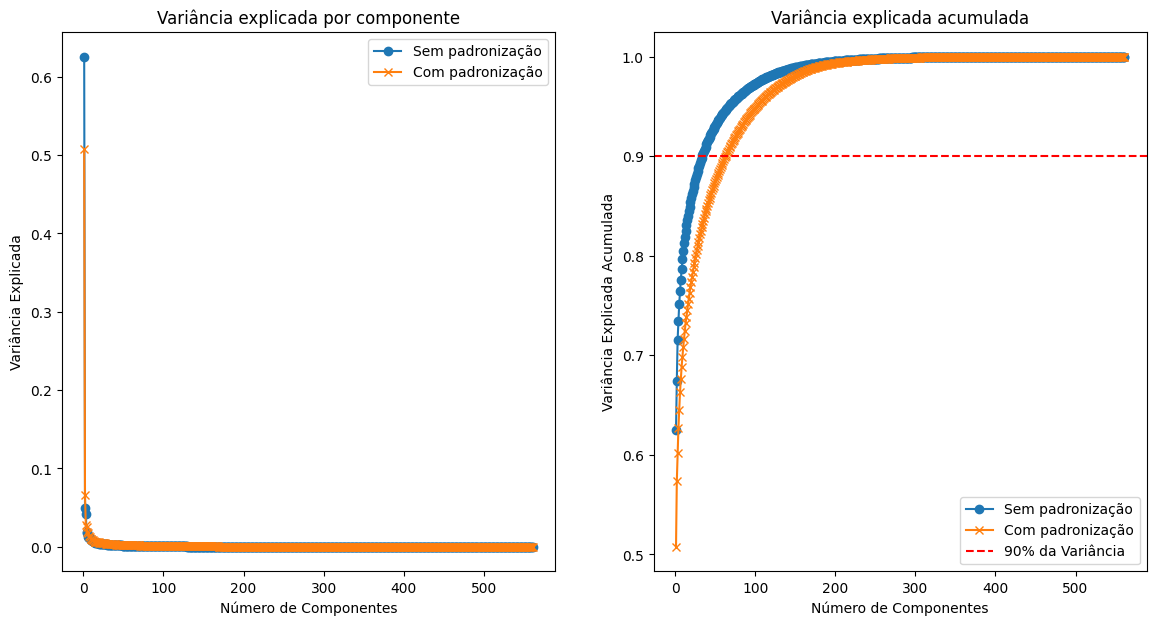

In [24]:
# Comparação das variâncias explicadas (sem e com padronização)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Sem padronização')
plt.plot(range(1, len(explained_variance_scaled)+1), explained_variance_scaled, marker='x', label='Com padronização')
plt.title('Variância explicada por componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', label='Sem padronização')
plt.plot(range(1, len(cumulative_variance_scaled)+1), cumulative_variance_scaled, marker='x', label='Com padronização')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% da Variância')
plt.title('Variância explicada acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()

plt.show()

### Análise dos Gráficos de Variância Explicada

#### Variância Explicada por Componente:

- **Sem Padronização**:
  - A variância explicada por componente mostra que os primeiros componentes capturam a maior parte da variância. Isso indica que algumas variáveis têm uma variância muito maior, dominando a análise de componentes principais (PCA) quando os dados não são padronizados.
  
- **Com Padronização**:
  - A variância explicada por componente é mais equilibrada, com os componentes principais distribuindo a variância de forma mais uniforme. Isso ocorre porque a padronização elimina as diferenças de escala entre as variáveis.

#### Variância Explicada Acumulada:

- **Sem Padronização**:
  - A curva de variância explicada acumulada atinge 90% da variância explicada com mais componentes principais. Isso indica que, sem padronização, um maior número de componentes é necessário para capturar a maior parte da variância nos dados.

- **Com Padronização**:
  - A curva de variância explicada acumulada atinge 90% da variância explicada com menos componentes. A padronização permite que o PCA capture uma maior parte da variância relevante em menos componentes.

### Conclusão:

- **Sem Padronização**:
  - Um número maior de componentes principais é necessário para explicar 90% da variância. Isso sugere que, sem padronização, algumas variáveis podem estar dominando a análise devido à sua maior escala.

- **Com Padronização**:
  - Menos componentes principais são necessários para explicar 90% da variância, indicando que a padronização ajuda a distribuir a variância de maneira mais equilibrada entre os componentes principais.

### Quantidade de Componentes para Explicar 90% da Variância:

- **Sem Padronização**: Aproximadamente 120 a 130 componentes são necessários.
- **Com Padronização**: Aproximadamente 80 a 90 componentes são necessários.

A padronização permite uma melhor distribuição da variância entre os componentes, o que pode ser vantajoso ao utilizar PCA para reduzir a dimensionalidade dos dados.


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

Primeiro, aplicamos PCA com 10 componentes principais nos dados padronizados e não padronizados.

In [26]:
# PCA sem padronização
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Padronização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA com padronização
pca_scaled = PCA(n_components=10)
X_train_pca_scaled = pca_scaled.fit_transform(X_train_scaled)
X_test_pca_scaled = pca_scaled.transform(X_test_scaled)

### 2. Treinar as árvores de decisão

In [27]:
# Instanciar os modelos de árvore de decisão com ccp_alpha=0.001
clf = DecisionTreeClassifier(ccp_alpha=0.001)
clf_scaled = DecisionTreeClassifier(ccp_alpha=0.001)

# Treinar no conjunto sem padronização
clf.fit(X_train_pca, y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

# Treinar no conjunto com padronização
clf_scaled.fit(X_train_pca_scaled, y_train)
y_train_pred_scaled = clf_scaled.predict(X_train_pca_scaled)
y_test_pred_scaled = clf_scaled.predict(X_test_pca_scaled)

### 3. Avaliar a acurácia

In [28]:
# Acurácia para o conjunto sem padronização
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Acurácia para o conjunto com padronização
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

# Exibir os resultados
(train_accuracy, test_accuracy), (train_accuracy_scaled, test_accuracy_scaled)

((0.8926822633297062, 0.8242280285035629),
 (0.8586779107725789, 0.7672209026128266))

### Resumo dos Resultados:

- **Modelo sem padronização**:
  - **Acurácia no treino**: 89.27%
  - **Acurácia no teste**: 82.42%

- **Modelo com padronização**:
  - **Acurácia no treino**: 85.87%
  - **Acurácia no teste**: 76.72%

### Análise:

- O modelo sem padronização teve uma acurácia maior tanto no conjunto de treino quanto no conjunto de teste, em comparação com o modelo que utilizou dados padronizados.
- A diferença de acurácia entre treino e teste no modelo sem padronização é menor (aproximadamente 7%), indicando uma melhor generalização em comparação ao modelo padronizado.
- O modelo com padronização apresentou uma acurácia de treino e teste menores, sugerindo que a padronização pode ter removido informações relevantes dos dados, reduzindo o desempenho do modelo.

### Conclusão:

Neste caso, a padronização dos dados não trouxe benefícios e até reduziu a acurácia do modelo. O modelo sem padronização demonstrou um melhor desempenho geral, sugerindo que para este dataset específico, as variáveis originais sem padronização foram mais eficazes para a análise de componentes principais (PCA) e subsequente modelagem com árvore de decisão.
